In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# Window-based coverage

In [2]:
## data1: Female.soapfinal file from soapcoverage results
## data2: Male.soapafinal file from soapcoverage results
Files can be found in Supplementary material: Dataset S3: Identification of X-linked scaffolds

data1 = pd.read_table('Female.soapfinal', delimiter = ' ', header = None)
fem = data1[[0,1,2]]
fem.columns = ['Scaffold_pan','Length','Fcov']
data2 = pd.read_table('Male.soapfinal', delimiter = ' ', header = None)
mal = data2[[0,1,2]]
mal.columns = ['Scaffold_pan','Length','Mcov']

In [3]:
## merge female and male coverage results
data = pd.merge(fem, mal, on=['Scaffold_pan','Length'])
data.head(3)

,Scaffold_pan,Length,Fcov,Mcov
0,scaffold_1,1,325.300,310.324
1,scaffold_1,10000001,255.129,209.328
2,scaffold_1,1000001,536.293,186.316


In [4]:
## calculate the ratio, summed one to each coverage depth for real values of log2
data['Fcov+1'] = data['Fcov']+1
data['Mcov+1'] = data['Mcov']+1
data['ratio'] = np.log2(data['Mcov+1']/data['Fcov+1'])
data

,Scaffold_pan,Length,Fcov,Mcov,Fcov+1,Mcov+1,ratio
0,scaffold_1,1,325.300,310.324,326.300,311.324,-0.067782
1,scaffold_1,10000001,255.129,209.328,256.129,210.328,-0.284230
2,scaffold_1,1000001,536.293,186.316,537.293,187.316,-1.520235
3,scaffold_1,100001,319.248,328.203,320.248,329.203,0.039788
4,scaffold_1,10001,293.331,264.116,294.331,265.116,-0.150816
...,...,...,...,...,...,...,...
45702,scaffold_99,50001,5483.990,4964.460,5484.990,4965.460,-0.143562
45703,scaffold_99,60001,8018.600,7346.920,8019.600,7347.920,-0.126194
45704,scaffold_99,70001,3096.350,2987.160,3097.350,2988.160,-0.051777
45705,scaffold_99,80001,3132.950,3100.970,3133.950,3101.970,-0.014797


# Cut-off value

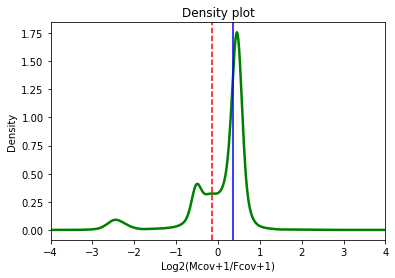

In [5]:
## Density plot 
figsize=(7, 5)
data.ratio.plot.density(color='green', linewidth=2.5)
plt.title('Density plot')
plt.xlim([-4, 4])
plt.axvline(data.ratio.median(),color='blue')
plt.axvline(data.ratio.median() - 0.5,color='red', linestyle='dashed')
plt.xlabel('Log2(Mcov+1/Fcov+1)')
plt.show()

In [6]:
## cut-off value:
data.ratio.median() -0.5

-0.14044291295908162

# Median for each scaffold from the windows

In [7]:
## calculates the median for each scaffold
win_scaf = data.groupby('Scaffold_pan', as_index = False).median('scaffold_1')
win_scaf

,Scaffold_pan,Length,Fcov,Mcov,Fcov+1,Mcov+1,ratio
0,scaffold_1,17590001.0,271.4220,190.3610,272.4220,191.3610,-0.508265
1,scaffold_10,6735001.0,272.5305,373.5045,273.5305,374.5045,0.453363
2,scaffold_100,230001.0,1557.5600,1481.2300,1558.5600,1482.2300,-0.032074
3,scaffold_101,220001.0,1361.7200,500.6020,1362.7200,501.6020,-1.338839
4,scaffold_102,220001.0,1385.2400,816.4550,1386.2400,817.4550,-0.809086
...,...,...,...,...,...,...,...
182,scaffold_95,245001.0,4410.5850,2673.6950,4411.5850,2674.6950,-0.754523
183,scaffold_96,240001.0,1686.8800,1553.1700,1687.8800,1554.1700,-0.100581
184,scaffold_97,240001.0,902.1460,750.7180,903.1460,751.7180,-0.252501
185,scaffold_98,230001.0,976.9410,998.3570,977.9410,999.3570,-0.030145


# Assign X/A

In [8]:
## X-linked: if median of scaffold < median-0.5 from windows
## A: otherwise
## win_scaf: dataframe with X/A assigment according to previous condition
## assign_cov.txt: output text file with X/A assigment for each scaffold
win_scaf['chromosome_pan'] = np.where((win_scaf['ratio'] <(data.ratio.median()-0.5)),'X','A')
win_scaf.to_csv('assign_cov.txt', index=False)
win_scaf

,Scaffold_pan,Length,Fcov,Mcov,Fcov+1,Mcov+1,ratio,chromosome_pan
0,scaffold_1,17590001.0,271.4220,190.3610,272.4220,191.3610,-0.508265,X
1,scaffold_10,6735001.0,272.5305,373.5045,273.5305,374.5045,0.453363,A
2,scaffold_100,230001.0,1557.5600,1481.2300,1558.5600,1482.2300,-0.032074,A
3,scaffold_101,220001.0,1361.7200,500.6020,1362.7200,501.6020,-1.338839,X
4,scaffold_102,220001.0,1385.2400,816.4550,1386.2400,817.4550,-0.809086,X
...,...,...,...,...,...,...,...,...
182,scaffold_95,245001.0,4410.5850,2673.6950,4411.5850,2674.6950,-0.754523,X
183,scaffold_96,240001.0,1686.8800,1553.1700,1687.8800,1554.1700,-0.100581,A
184,scaffold_97,240001.0,902.1460,750.7180,903.1460,751.7180,-0.252501,X
185,scaffold_98,230001.0,976.9410,998.3570,977.9410,999.3570,-0.030145,A


In [9]:
## data25w: select information only for largest 25 scaffolds
## data25_cov.txt: output text file with name of largest 25 scaffolds and X/A assignment
data25w = win_scaf.loc[win_scaf['Scaffold_pan'].isin(['scaffold_1', 'scaffold_2','scaffold_3','scaffold_4','scaffold_5','scaffold_6',
                                    'scaffold_7','scaffold_8','scaffold_9','scaffold_10','scaffold_11',
                                   'scaffold_12','scaffold_13','scaffold_14','scaffold_15','scaffold_16','scaffold_17',
                                   'scaffold_18','scaffold_19','scaffold_20','scaffold_21','scaffold_22',
                                   'scaffold_23','scaffold_24','scaffold_25'])]
data25w.to_csv('data25_cov.txt', index=False)